<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

#### Data Preparation
----

In [1]:
import pandas as pd
import csv

In [2]:
df = pd.read_csv('dataset_tm_10k.csv')

In [3]:
df.shape

(10787, 8)

In [4]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [5]:
df.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
10782,2821.0,610.0,50.0,MQ,DFW,SPS,2,0
10783,2618.0,839.0,118.0,XE,SDF,EWR,2,0
10784,1973.0,1160.0,124.0,DL,ATL,MIA,2,0
10785,528.0,1275.0,112.0,US,PHX,RNO,4,0
10786,2254.0,970.0,NaN,DL,ATL,CMH,4,1


In [6]:
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [7]:
df.isna().sum()

Flight            0
Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [8]:
#imputasi numerik pada kolom time menggunakan mean
meanImputation = df['Time'].mean()
meanImputation

803.37825297559

In [9]:
df['Time'].fillna(meanImputation,
                    inplace=True)

In [10]:
df.isna().sum()

Flight            0
Time              0
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [11]:
#imputasi numerik pada kolom Length menggunakan median
medianImputation = df['Length'].median()
medianImputation

116.0

In [12]:
df['Length'].fillna(medianImputation,
                    inplace=True)

In [13]:
df.isna().sum()

Flight           0
Time             0
Length           0
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [14]:
#imputasi variable kategorik pada kolom airline  
import numpy as np
from sklearn.impute import SimpleImputer

In [15]:
modeImputer = SimpleImputer(strategy='most_frequent')
df['Airline'] = modeImputer.fit_transform(df[['Airline']]).flatten()

In [16]:
unique_airline_values = np.unique(df['Airline'])
print(unique_airline_values)

['9E' 'AA' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'OH' 'OO' 'UA'
 'US' 'WN' 'XE' 'YV']


In [17]:
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

#### Melakukan Winsorizing terhaadap Outlier
----

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

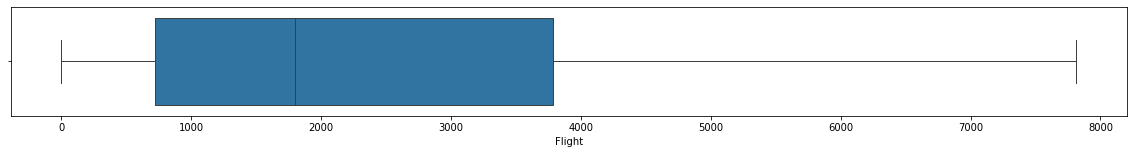

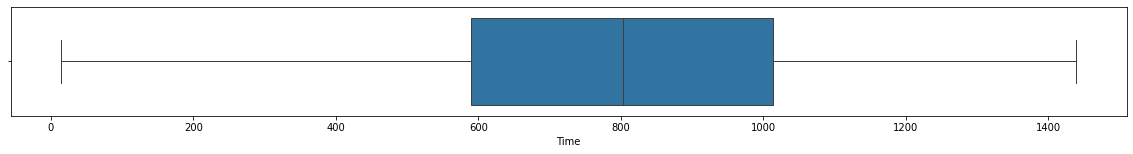

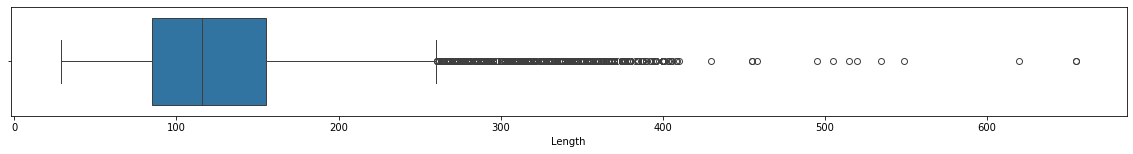

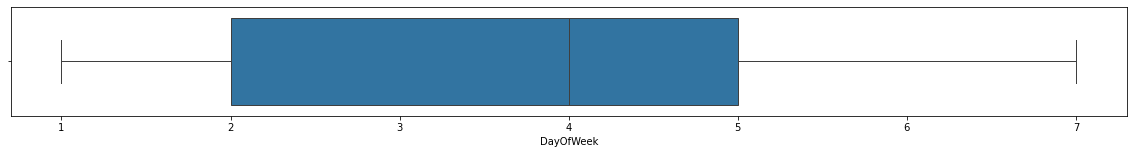

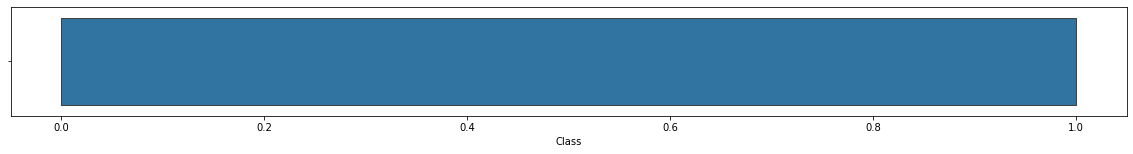

In [19]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [20]:
df['Length'].max()

655.0

In [21]:
from scipy.stats.mstats import winsorize

In [22]:
df['Length'] = winsorize(df['Length'], limits=[0, 0.1])

<Axes: xlabel='Length'>

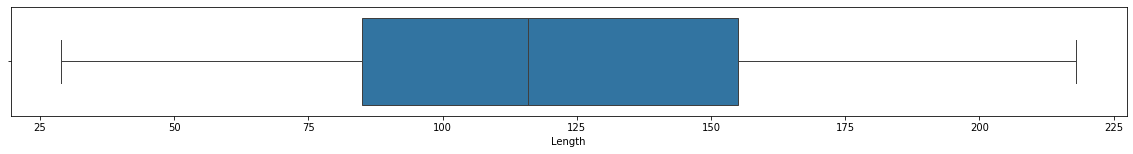

In [23]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Length'])

In [24]:
df['Length'].max()

218.0

In [25]:
df.shape

(10787, 8)

#### Melakukan Scalling
----

In [26]:
# Membuang Kolom "Flight"
df = df.iloc[:,1:]

In [27]:
df.head(3)

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,WN,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,218.0,DL,SEA,CVG,7,0


In [28]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [29]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.914286,WN,IAH,PHX,5,0
1,-1.033911,-0.714286,OO,DSM,MKE,2,0
2,-0.149477,1.457143,DL,SEA,CVG,7,0
3,-0.491458,1.457143,WN,SNA,MDW,7,1
4,-0.644760,0.242857,CO,IAH,MCO,6,1


#### Linear Regression
----

In [30]:
#copy untuk linear regression
df_lr = df.copy()

In [31]:
# Membuat variabel independen (x) dan variabel dependen(y)
X = df_lr[['Time']]
y = df_lr['Class']

Pada tahap selanjutnya, data dibagi menjadi 2 bagian:
- Data Latih (Training Data): untuk mengembangkan model : 70%
- Data Uji (Testing Data): untuk Mengukur performansi model 30%


In [32]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.35403114 0.44670824 0.53691394 ... 0.45125022 0.39555048 0.48995755]


In [36]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.354031
6132,0,0.446708
9949,0,0.536914
10440,0,0.519367
9097,1,0.447944


In [37]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [38]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

Accuracy: 0.562


#### Logistic Regression
----

In [39]:
# copy untuk Logistic Regression
df_lg = df.copy()

In [40]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [41]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_lg[cat_col] = df_lg[cat_col].apply(le.fit_transform)

In [42]:
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.914286,WN,IAH,PHX,5,0
1,-1.033911,-0.714286,OO,DSM,MKE,2,0
2,-0.149477,1.457143,DL,SEA,CVG,7,0
3,-0.491458,1.457143,WN,SNA,MDW,7,1
4,-0.644760,0.242857,CO,IAH,MCO,6,1


In [43]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_lg.iloc[:,0:-1].values
y = df_lg.iloc[:,-1].values

In [44]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [45]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

In [46]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [47]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [48]:
# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1367,  456],
       [ 951,  463]])

Text(0.5, 257.44, 'Predicted label')

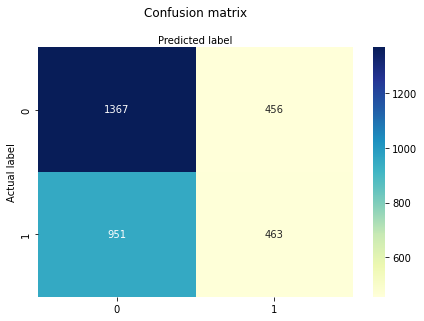

In [49]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.59      0.75      0.66      1823
     Delayed       0.50      0.33      0.40      1414

    accuracy                           0.57      3237
   macro avg       0.55      0.54      0.53      3237
weighted avg       0.55      0.57      0.55      3237



In [51]:
import matplotlib.pyplot as plt

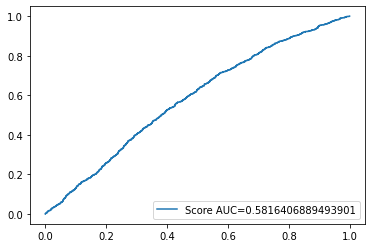

In [52]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=4)

# Menampilkan grafik
plt.show()

#### K-NN
----

In [57]:
# copy untuk K-NN
df_knn = df.copy()

In [58]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [59]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.557


In [60]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.545


In [61]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.59      0.60      0.60      1823
     Delayed       0.48      0.47      0.47      1414

    accuracy                           0.55      3237
   macro avg       0.54      0.54      0.54      3237
weighted avg       0.54      0.55      0.54      3237



In [62]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

In [63]:
import matplotlib.pyplot as plt

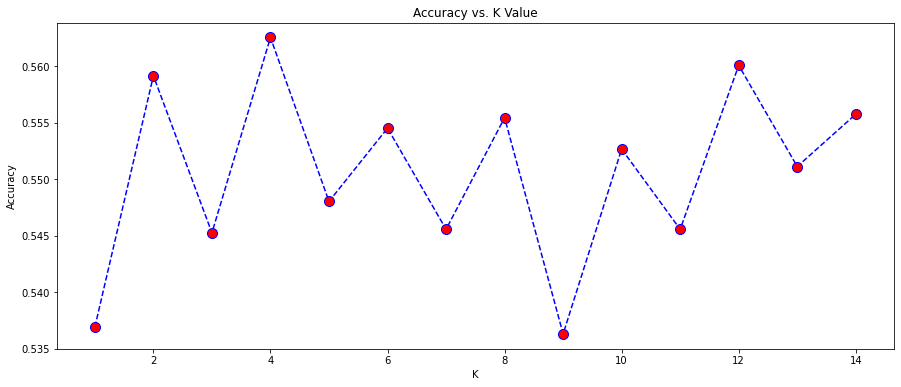

In [64]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [65]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy * 100, 2)}%")

Accuracy on the test set: 56.26%


In [67]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.59      0.77      0.66      1823
     Delayed       0.50      0.30      0.38      1414

    accuracy                           0.56      3237
   macro avg       0.54      0.53      0.52      3237
weighted avg       0.55      0.56      0.54      3237



In [68]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

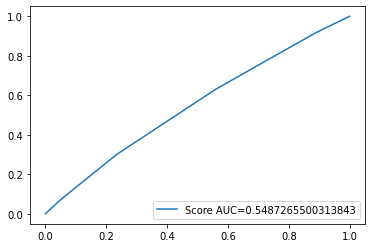

In [69]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# **Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?** #

Berdasarkan pemodelan yang telah dilakukan, akurasi yang didapatkan dari tiap algoritma adalah :
1. Algoritma Linear Regression : Accuracy: 0.562
2. Algoritma Logistic Regression : Accuracy: 0.57
3. Algoritma KNN : Accuracy: 0.56

Algoritma Logistic Regression memiliki Akurasi tertinggi dengan nilai desimal 0.57 atau 57 %